AUC Score: 0.944


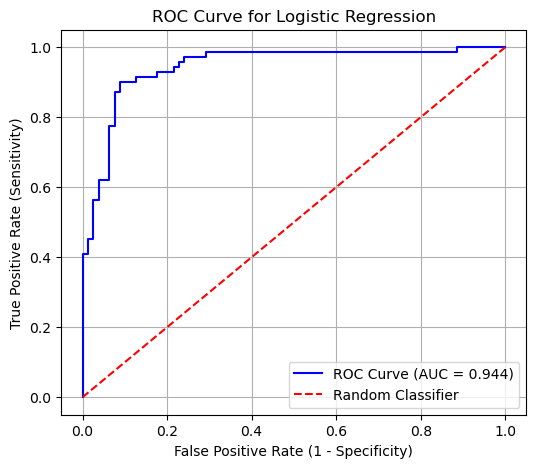

In [2]:
# Import necessary libraries
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# 1️⃣ Create a sample binary classification dataset
X, y = make_classification(n_samples=500, n_features=10, 
                           n_classes=2, random_state=42)

# 2️⃣ Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)

# 3️⃣ Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# 4️⃣ Get predicted probabilities for the positive class (1)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# 5️⃣ Compute FPR, TPR, and thresholds for ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# 6️⃣ Compute AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"AUC Score: {auc_score:.3f}")

# 7️⃣ Plot ROC Curve
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.3f})')
plt.plot([0,1], [0,1], color='red', linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve for Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()
